In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
plt.rcParams['figure.figsize']=(12,6)


In [2]:
pwd()


'/home/baodong/spiced_projects/unsupervised-lemon-student-code/week07'

In [3]:
df=pd.read_csv('./ECA_blended_custom/TG_STAID002759.txt',delimiter=',', skiprows=19,index_col = 1,parse_dates=True)


In [51]:
len(df)

53112

In [52]:
#train test split
df_train=df[:-10000]
df_test=df[-10000:]

In [53]:
df_train

,SOUID,TG,Q_TG
DATE,,,
1876-01-01,127488,22,0
1876-01-02,127488,25,0
1876-01-03,127488,3,0
1876-01-04,127488,-58,0
1876-01-05,127488,-98,0
...,...,...,...
1994-01-09,111448,14,0
1994-01-10,111448,22,0
1994-01-11,111448,24,0


In [27]:
df.columns

Index([' SOUID', '   TG', ' Q_TG'], dtype='object')

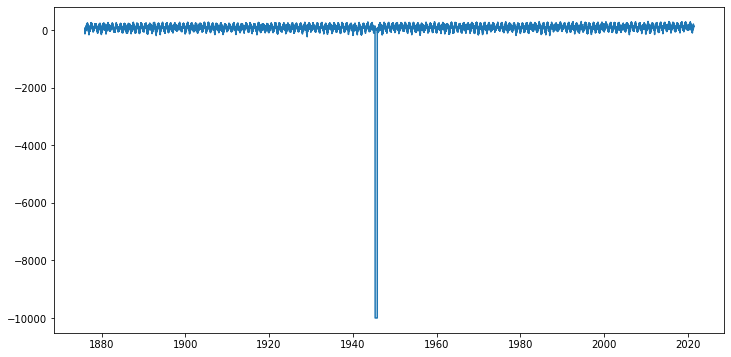

In [28]:
X=df.index
y=df['   TG']
plt.plot(X,y)

In [54]:

#cols=[x for x in enumerate(df[' Q_TG']) if df[' Q_TG'] !=0]

df_c = df_train.drop(df[df[' Q_TG']!=0].index)

# df_c = df.drop(df[<some boolean condition>].index)

#df_c=df.drop(df[' Q_TG']=[df[' Q_TG'] !=0].index)
#df_clear = df.drop(df[(df['x']<0.01) | (df['x']>10)].index)

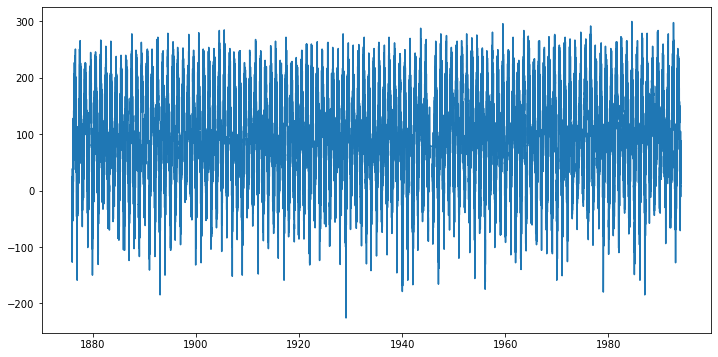

In [55]:
#plot the data
X=df_c.index
y=df_c['   TG']
plt.plot(X,y)

In [9]:
# df_clean=df.droploc[df['   TG'] < -200]

In [56]:
#add colloumn'timr_step'
df_c['time_step']=range(len(df_c))

In [57]:
df_c

,SOUID,TG,Q_TG,time_step
DATE,,,,
1876-01-01,127488,22,0,0
1876-01-02,127488,25,0,1
1876-01-03,127488,3,0,2
1876-01-04,127488,-58,0,3
1876-01-05,127488,-98,0,4
...,...,...,...,...
1994-01-09,111448,14,0,42911
1994-01-10,111448,22,0,42912
1994-01-11,111448,24,0,42913


In [58]:
X=df_c[['time_step']]
y=df_c['   TG']

In [59]:
df_c['month'] = pd.DatetimeIndex(df_c.index).month

In [60]:
df_c

,SOUID,TG,Q_TG,time_step,month
DATE,,,,,
1876-01-01,127488,22,0,0,1
1876-01-02,127488,25,0,1,1
1876-01-03,127488,3,0,2,1
1876-01-04,127488,-58,0,3,1
1876-01-05,127488,-98,0,4,1
...,...,...,...,...,...
1994-01-09,111448,14,0,42911,1
1994-01-10,111448,22,0,42912,1
1994-01-11,111448,24,0,42913,1


In [61]:
m=LinearRegression()
m.fit(X,y)

LinearRegression()

In [62]:
y_p=m.predict(X)
df_c['y_p']=y_p

In [63]:
#plot a small size of the train data
dfs=df_c[df_c.index < '1878']
dfs

,SOUID,TG,Q_TG,time_step,month,y_p
DATE,,,,,,
1876-01-01,127488,22,0,0,1,87.696339
1876-01-02,127488,25,0,1,1,87.696511
1876-01-03,127488,3,0,2,1,87.696683
1876-01-04,127488,-58,0,3,1,87.696855
1876-01-05,127488,-98,0,4,1,87.697027
...,...,...,...,...,...,...
1877-12-27,127488,5,0,726,12,87.821273
1877-12-28,127488,0,0,727,12,87.821446
1877-12-29,127488,-5,0,728,12,87.821618


<AxesSubplot:xlabel='    DATE'>

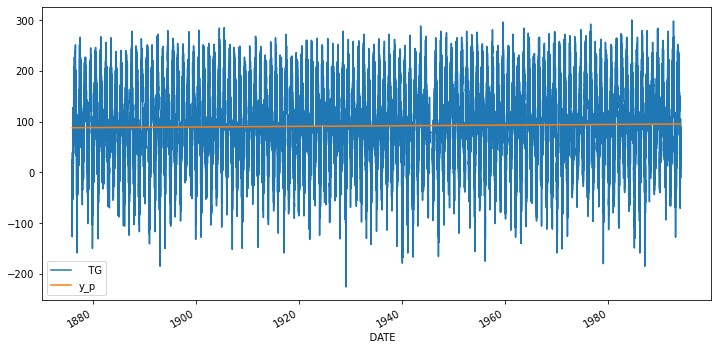

In [64]:
df_c[['   TG','y_p']].plot()

<AxesSubplot:xlabel='    DATE'>

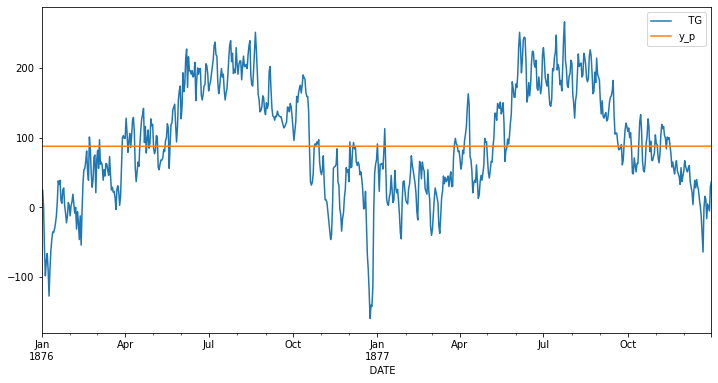

In [65]:
dfs[['   TG','y_p']].plot()

In [66]:
#add new column 'month'
df_c['month']=df_c.index.month


In [67]:
df_c


,SOUID,TG,Q_TG,time_step,month,y_p
DATE,,,,,,
1876-01-01,127488,22,0,0,1,87.696339
1876-01-02,127488,25,0,1,1,87.696511
1876-01-03,127488,3,0,2,1,87.696683
1876-01-04,127488,-58,0,3,1,87.696855
1876-01-05,127488,-98,0,4,1,87.697027
...,...,...,...,...,...,...
1994-01-09,111448,14,0,42911,1,95.080725
1994-01-10,111448,22,0,42912,1,95.080897
1994-01-11,111448,24,0,42913,1,95.081069


<AxesSubplot:xlabel='month'>

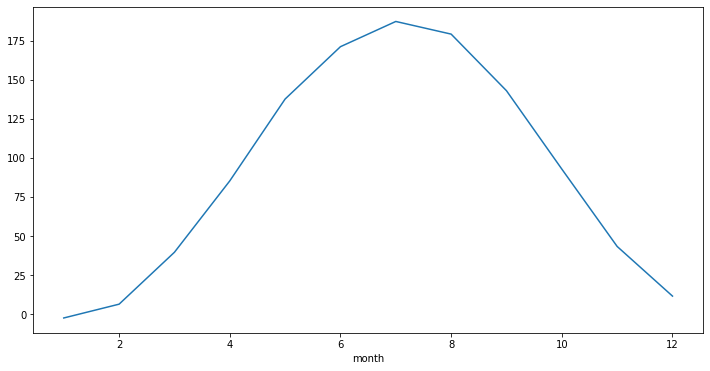

In [68]:
#find the pattern
df_c.groupby('month')['   TG'].mean().plot()

In [70]:
df_c.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', name='    DATE', length=42916)

In [71]:
#get dummies of month data
month_dummies=pd.get_dummies(df_c.index.month).set_index(df_c.index)

In [72]:
month_dummies = pd.get_dummies(df.index.month, prefix='month').set_index(df.index)

In [73]:
df_c=df_c.join(month_dummies)

In [74]:
df_c

,SOUID,TG,Q_TG,time_step,month,y_p,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,,,,,,,
1876-01-01,127488,22,0,0,1,87.696339,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,127488,25,0,1,1,87.696511,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,127488,3,0,2,1,87.696683,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,127488,-58,0,3,1,87.696855,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,127488,-98,0,4,1,87.697027,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994-01-09,111448,14,0,42911,1,95.080725,1,0,0,0,0,0,0,0,0,0,0,0
1994-01-10,111448,22,0,42912,1,95.080897,1,0,0,0,0,0,0,0,0,0,0,0
1994-01-11,111448,24,0,42913,1,95.081069,1,0,0,0,0,0,0,0,0,0,0,0


In [77]:
df_c.columns

Index([' SOUID', '   TG', ' Q_TG', 'time_step', 'month', 'y_p', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [84]:
X=df_c.drop([' SOUID',' Q_TG','month','   TG','y_p','time_step'],axis=1)
y=df_c['   TG']

In [85]:
X

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
DATE,,,,,,,,,,,,
1876-01-01,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-02,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-03,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-04,1,0,0,0,0,0,0,0,0,0,0,0
1876-01-05,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1994-01-09,1,0,0,0,0,0,0,0,0,0,0,0
1994-01-10,1,0,0,0,0,0,0,0,0,0,0,0
1994-01-11,1,0,0,0,0,0,0,0,0,0,0,0


In [87]:
m2=LinearRegression()
m2.fit(X,y)

LinearRegression()

In [92]:
# add predicted data as column 'seasonality' to the train data
df_c['seasonality']=m2.predict(X)

<AxesSubplot:xlabel='    DATE'>

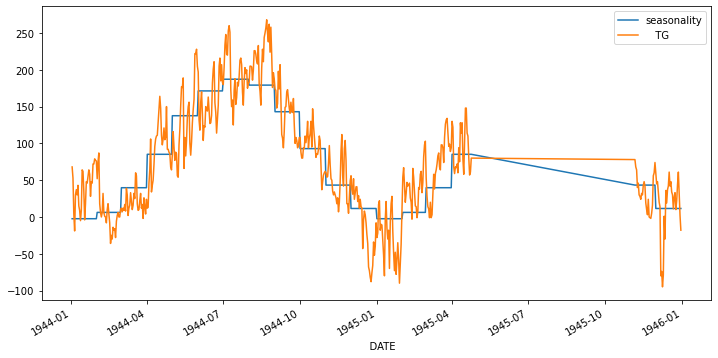

In [132]:
#df_c[df_c.index<'1890']['seasonality','   TG'].plot()
s1=df_c[df_c.index<'1946']
s2=s1[s1.index>'1944']
s2[['seasonality','   TG']].dropna().plot()
#df_c[df_c.index<'1950'][df_c.index>'1940'][['seasonality','   TG']].plot()

# df.drop(index=['1945-12-31':'1946-01-01'])  #question>



In [ ]:
df = df[~((df['DATE'] >= '1945-01-01') & (df['DATE'] <= '1946-12-31'))]

 #df_new=pd.concat(df_c[df_c.index<'1946-01-01'].reset_index(),df_c['1945-12-31'> df_c.index].reset_index())  #question>

In [144]:
import datetime
start='1945-01-01'
end='1945-12-31'
 
datestart=datetime.datetime.strptime(start,'%Y-%m-%d')
dateend=datetime.datetime.strptime(end,'%Y-%m-%d')
 
data_list = list()
while datestart<=dateend:
    data_list.append(datestart.strftime('%Y-%m-%d')) 
    datestart+=datetime.timedelta(days=1)
print (data_list)


['1945-01-01', '1945-01-02', '1945-01-03', '1945-01-04', '1945-01-05', '1945-01-06', '1945-01-07', '1945-01-08', '1945-01-09', '1945-01-10', '1945-01-11', '1945-01-12', '1945-01-13', '1945-01-14', '1945-01-15', '1945-01-16', '1945-01-17', '1945-01-18', '1945-01-19', '1945-01-20', '1945-01-21', '1945-01-22', '1945-01-23', '1945-01-24', '1945-01-25', '1945-01-26', '1945-01-27', '1945-01-28', '1945-01-29', '1945-01-30', '1945-01-31', '1945-02-01', '1945-02-02', '1945-02-03', '1945-02-04', '1945-02-05', '1945-02-06', '1945-02-07', '1945-02-08', '1945-02-09', '1945-02-10', '1945-02-11', '1945-02-12', '1945-02-13', '1945-02-14', '1945-02-15', '1945-02-16', '1945-02-17', '1945-02-18', '1945-02-19', '1945-02-20', '1945-02-21', '1945-02-22', '1945-02-23', '1945-02-24', '1945-02-25', '1945-02-26', '1945-02-27', '1945-02-28', '1945-03-01', '1945-03-02', '1945-03-03', '1945-03-04', '1945-03-05', '1945-03-06', '1945-03-07', '1945-03-08', '1945-03-09', '1945-03-10', '1945-03-11', '1945-03-12', '1945

In [148]:
import time
date=[]
for a in data_list:
    timeArray = time.strptime(a, "%Y-%m-%d")
    timeStamp = int(time.mktime(timeArray))
    timeArray = time.localtime(timeStamp)
    otherStyleTime = time.strftime("%Y-%m-%d", timeArray)
    date.append(otherStyleTime)
print(date)

['1945-01-01', '1945-01-02', '1945-01-03', '1945-01-04', '1945-01-05', '1945-01-06', '1945-01-07', '1945-01-08', '1945-01-09', '1945-01-10', '1945-01-11', '1945-01-12', '1945-01-13', '1945-01-14', '1945-01-15', '1945-01-16', '1945-01-17', '1945-01-18', '1945-01-19', '1945-01-20', '1945-01-21', '1945-01-22', '1945-01-23', '1945-01-24', '1945-01-25', '1945-01-26', '1945-01-27', '1945-01-28', '1945-01-29', '1945-01-30', '1945-01-31', '1945-02-01', '1945-02-02', '1945-02-03', '1945-02-04', '1945-02-05', '1945-02-06', '1945-02-07', '1945-02-08', '1945-02-09', '1945-02-10', '1945-02-11', '1945-02-12', '1945-02-13', '1945-02-14', '1945-02-15', '1945-02-16', '1945-02-17', '1945-02-18', '1945-02-19', '1945-02-20', '1945-02-21', '1945-02-22', '1945-02-23', '1945-02-24', '1945-02-25', '1945-02-26', '1945-02-27', '1945-02-28', '1945-03-01', '1945-03-02', '1945-03-03', '1945-03-04', '1945-03-05', '1945-03-06', '1945-03-07', '1945-03-08', '1945-03-09', '1945-03-10', '1945-03-11', '1945-03-12', '1945

In [154]:
 for i in date:
        print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [149]:
df_cn=df_c.drop(index=date,)

KeyError: "['1945-01-01' '1945-01-02' '1945-01-03' '1945-01-04' '1945-01-05'\n '1945-01-06' '1945-01-07' '1945-01-08' '1945-01-09' '1945-01-10'\n '1945-01-11' '1945-01-12' '1945-01-13' '1945-01-14' '1945-01-15'\n '1945-01-16' '1945-01-17' '1945-01-18' '1945-01-19' '1945-01-20'\n '1945-01-21' '1945-01-22' '1945-01-23' '1945-01-24' '1945-01-25'\n '1945-01-26' '1945-01-27' '1945-01-28' '1945-01-29' '1945-01-30'\n '1945-01-31' '1945-02-01' '1945-02-02' '1945-02-03' '1945-02-04'\n '1945-02-05' '1945-02-06' '1945-02-07' '1945-02-08' '1945-02-09'\n '1945-02-10' '1945-02-11' '1945-02-12' '1945-02-13' '1945-02-14'\n '1945-02-15' '1945-02-16' '1945-02-17' '1945-02-18' '1945-02-19'\n '1945-02-20' '1945-02-21' '1945-02-22' '1945-02-23' '1945-02-24'\n '1945-02-25' '1945-02-26' '1945-02-27' '1945-02-28' '1945-03-01'\n '1945-03-02' '1945-03-03' '1945-03-04' '1945-03-05' '1945-03-06'\n '1945-03-07' '1945-03-08' '1945-03-09' '1945-03-10' '1945-03-11'\n '1945-03-12' '1945-03-13' '1945-03-14' '1945-03-15' '1945-03-16'\n '1945-03-17' '1945-03-18' '1945-03-19' '1945-03-20' '1945-03-21'\n '1945-03-22' '1945-03-23' '1945-03-24' '1945-03-25' '1945-03-26'\n '1945-03-27' '1945-03-28' '1945-03-29' '1945-03-30' '1945-03-31'\n '1945-04-01' '1945-04-02' '1945-04-03' '1945-04-04' '1945-04-05'\n '1945-04-06' '1945-04-07' '1945-04-08' '1945-04-09' '1945-04-10'\n '1945-04-11' '1945-04-12' '1945-04-13' '1945-04-14' '1945-04-15'\n '1945-04-16' '1945-04-17' '1945-04-18' '1945-04-19' '1945-04-20'\n '1945-04-21' '1945-04-22' '1945-04-23' '1945-04-24' '1945-04-25'\n '1945-04-26' '1945-04-27' '1945-04-28' '1945-04-29' '1945-04-30'\n '1945-05-01' '1945-05-02' '1945-05-03' '1945-05-04' '1945-05-05'\n '1945-05-06' '1945-05-07' '1945-05-08' '1945-05-09' '1945-05-10'\n '1945-05-11' '1945-05-12' '1945-05-13' '1945-05-14' '1945-05-15'\n '1945-05-16' '1945-05-17' '1945-05-18' '1945-05-19' '1945-05-20'\n '1945-05-21' '1945-05-22' '1945-05-23' '1945-05-24' '1945-05-25'\n '1945-05-26' '1945-05-27' '1945-05-28' '1945-05-29' '1945-05-30'\n '1945-05-31' '1945-06-01' '1945-06-02' '1945-06-03' '1945-06-04'\n '1945-06-05' '1945-06-06' '1945-06-07' '1945-06-08' '1945-06-09'\n '1945-06-10' '1945-06-11' '1945-06-12' '1945-06-13' '1945-06-14'\n '1945-06-15' '1945-06-16' '1945-06-17' '1945-06-18' '1945-06-19'\n '1945-06-20' '1945-06-21' '1945-06-22' '1945-06-23' '1945-06-24'\n '1945-06-25' '1945-06-26' '1945-06-27' '1945-06-28' '1945-06-29'\n '1945-06-30' '1945-07-01' '1945-07-02' '1945-07-03' '1945-07-04'\n '1945-07-05' '1945-07-06' '1945-07-07' '1945-07-08' '1945-07-09'\n '1945-07-10' '1945-07-11' '1945-07-12' '1945-07-13' '1945-07-14'\n '1945-07-15' '1945-07-16' '1945-07-17' '1945-07-18' '1945-07-19'\n '1945-07-20' '1945-07-21' '1945-07-22' '1945-07-23' '1945-07-24'\n '1945-07-25' '1945-07-26' '1945-07-27' '1945-07-28' '1945-07-29'\n '1945-07-30' '1945-07-31' '1945-08-01' '1945-08-02' '1945-08-03'\n '1945-08-04' '1945-08-05' '1945-08-06' '1945-08-07' '1945-08-08'\n '1945-08-09' '1945-08-10' '1945-08-11' '1945-08-12' '1945-08-13'\n '1945-08-14' '1945-08-15' '1945-08-16' '1945-08-17' '1945-08-18'\n '1945-08-19' '1945-08-20' '1945-08-21' '1945-08-22' '1945-08-23'\n '1945-08-24' '1945-08-25' '1945-08-26' '1945-08-27' '1945-08-28'\n '1945-08-29' '1945-08-30' '1945-08-31' '1945-09-01' '1945-09-02'\n '1945-09-03' '1945-09-04' '1945-09-05' '1945-09-06' '1945-09-07'\n '1945-09-08' '1945-09-09' '1945-09-10' '1945-09-11' '1945-09-12'\n '1945-09-13' '1945-09-14' '1945-09-15' '1945-09-16' '1945-09-17'\n '1945-09-18' '1945-09-19' '1945-09-20' '1945-09-21' '1945-09-22'\n '1945-09-23' '1945-09-24' '1945-09-25' '1945-09-26' '1945-09-27'\n '1945-09-28' '1945-09-29' '1945-09-30' '1945-10-01' '1945-10-02'\n '1945-10-03' '1945-10-04' '1945-10-05' '1945-10-06' '1945-10-07'\n '1945-10-08' '1945-10-09' '1945-10-10' '1945-10-11' '1945-10-12'\n '1945-10-13' '1945-10-14' '1945-10-15' '1945-10-16' '1945-10-17'\n '1945-10-18' '1945-10-19' '1945-10-20' '1945-10-21' '1945-10-22'\n '1945-10-23' '1945-10-24' '1945-10-25' '1945-10-26' '1945-10-27'\n '1945-10-28' '1945-10-29' '1945-10-30' '1945-10-31' '1945-11-01'\n '1945-11-02' '1945-11-03' '1945-11-04' '1945-11-05' '1945-11-06'\n '1945-11-07' '1945-11-08' '1945-11-09' '1945-11-10' '1945-11-11'\n '1945-11-12' '1945-11-13' '1945-11-14' '1945-11-15' '1945-11-16'\n '1945-11-17' '1945-11-18' '1945-11-19' '1945-11-20' '1945-11-21'\n '1945-11-22' '1945-11-23' '1945-11-24' '1945-11-25' '1945-11-26'\n '1945-11-27' '1945-11-28' '1945-11-29' '1945-11-30' '1945-12-01'\n '1945-12-02' '1945-12-03' '1945-12-04' '1945-12-05' '1945-12-06'\n '1945-12-07' '1945-12-08' '1945-12-09' '1945-12-10' '1945-12-11'\n '1945-12-12' '1945-12-13' '1945-12-14' '1945-12-15' '1945-12-16'\n '1945-12-17' '1945-12-18' '1945-12-19' '1945-12-20' '1945-12-21'\n '1945-12-22' '1945-12-23' '1945-12-24' '1945-12-25' '1945-12-26'\n '1945-12-27' '1945-12-28' '1945-12-29' '1945-12-30' '1945-12-31'] not found in axis"

In [157]:
df_c['remainder']=df_c['   TG']-df_c['seasonality']-df_c['y_p']

In [158]:
df_c['remainder'].to_csv('temp_remainder.csv')

<AxesSubplot:xlabel='    DATE'>

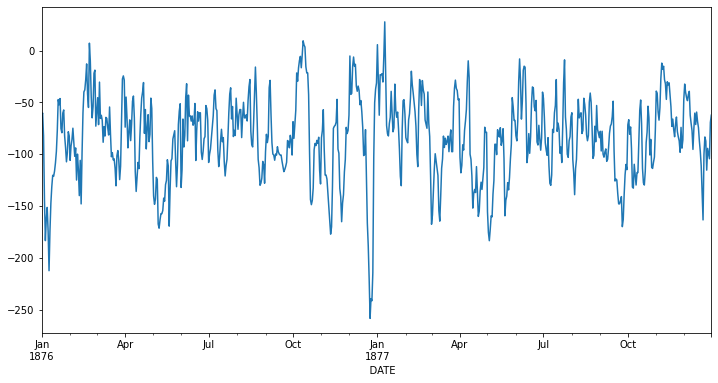

In [159]:
df_c[df_c.index<'1878']['remainder'].plot()

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [116]:
sd=seasonal_decompose(df_c['   TG'],freq = 52)

<ipython-input-116-deeb3858cfba>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sd=seasonal_decompose(df_c['   TG'],freq = 52)


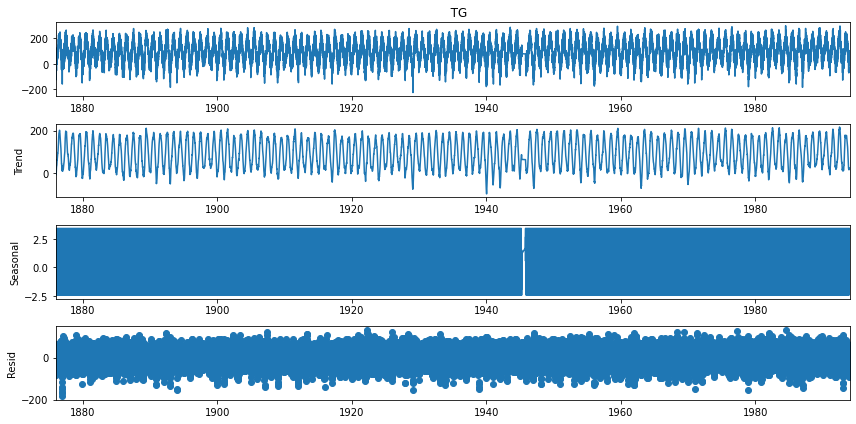

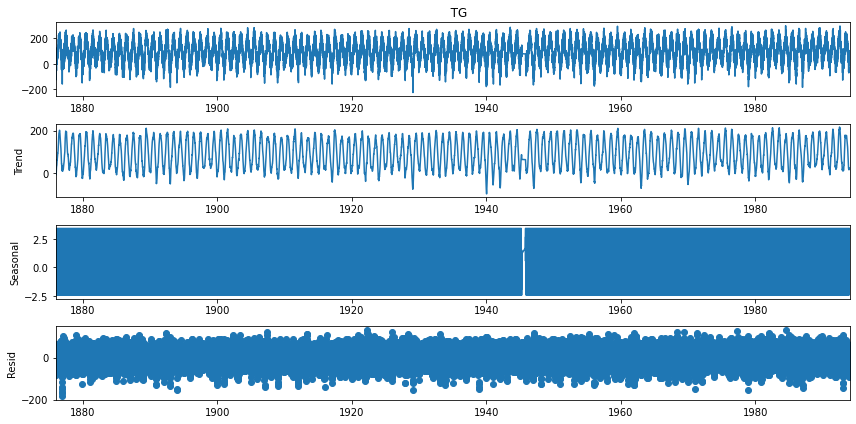

In [117]:
sd.plot()